# 5 - UMAP - Uniform Manifold Approximation and Projection

**AUTOR: Fabrizio Ramirez Cutimbo**

**OBJETIVOS:**

+ Aplicar técnicas de preprocesamiento: Estandarización
+ Identificar variables representativas utilizando téncnicas de reducción de dimensionalidad UMAP.
+ Visualización de variables representativas en gráficos de dispersión. 
---

In [1]:
# Librerias de manejo de datos
import pandas as pd
import umap
#Graficos
import matplotlib.pyplot as plt
import seaborn as sns
#Librerias de preprocesamiento
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

c:\Users\fabrizio\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pd_companias = pd.read_csv('Datasets Procesados/directorio_empresas_final.csv', dtype={'RUC': 'object'})

In [3]:
pd_companias.columns

Index(['EXPEDIENTE', 'RUC', 'SITUACION_LEGAL', 'FECHA_CONSTITUCION', 'TIPO',
       'PAIS', 'REGION', 'PROVINCIA', 'CANTON', 'CIUDAD', 'CIIU_NIVEL_1',
       'CIIU_NIVEL_1_DESC', 'CIIU_NIVEL_3', 'CIIU_NIVEL_3_DESC',
       'CIIU_NIVEL_4', 'CIIU_NIVEL_4_DESC', 'CIIU_NIVEL_6',
       'CIIU_NIVEL_6_DESC', 'ACTIVO_2022', 'ACTIVO_CORRIENTE_2022',
       'INVENTARIOS_2022', 'ACTIVOS_NO_CORRIENTES_2022', 'PASIVO_2022',
       'PASIVO_CORRIENTE_2022', 'PASIVO_NO_CORRIENTE_2022',
       'PATRIMONIO_NETO_2022', 'INGRESOS_ACTIVIDADES_ORDINARIAS_2022',
       'GANANCIA_BRUTA_2022', 'OTROS_INGRESOS_2022',
       'COSTO_VENTAS_PRODUCCION_2022', 'GASTOS_2022',
       'UTILIDAD_OPERATIVA_2022', 'GANACIA_PERDIDA_ANTES_IR_2022',
       'IMPUESTO_RENTA_2022', 'UTILIDAD_NETA_2022', 'ACTIVO_2023',
       'ACTIVO_CORRIENTE_2023', 'INVENTARIOS_2023',
       'ACTIVOS_NO_CORRIENTES_2023', 'PASIVO_2023', 'PASIVO_CORRIENTE_2023',
       'PASIVO_NO_CORRIENTE_2023', 'PATRIMONIO_NETO_2023',
       'INGRESOS_ACTIVID

### Codificación y Estandarización

In [4]:
# COLUMNA CIIU_NIVEL_1
# Definición del OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  

# Aplicar Encoding a CIIU 1
encoded = encoder.fit_transform(pd_companias[['CIIU_NIVEL_1']])
# Convertir a DataFrame para facilitar la unión
pd_encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['CIIU_NIVEL_1']))
# Combinar con el DataFrame original
pd_companias = pd.concat([pd_companias, pd_encoded_df], axis=1)

# Aplicar Encoding a REGION
encoded = encoder.fit_transform(pd_companias[['REGION']])
# Convertir a DataFrame para facilitar la unión
pd_encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['REGION']))
# Combinar con el DataFrame original
pd_companias = pd.concat([pd_companias, pd_encoded_df], axis=1)

# Crear un diccionario de Encoding
orden_segmento = {
    'MICRO': 1,
    'PEQUENA': 2,
    'MEDIANA': 3,
    'GRANDE': 4
}

# LAbel Encoding manual para columna SEGMENTO (Categórica Ordinal)
pd_companias['SEGMENTO_ENCODED'] = pd_companias['SEGMENTO'].map(orden_segmento)

#Visualziar encoding
# pd_companias.sample(2)


# Variables a Normalizar
var_to_normalize = ['ACTIVO_2023', 'ACTIVO_CORRIENTE_2023', 'INVENTARIOS_2023', 'ACTIVOS_NO_CORRIENTES_2023', 'PASIVO_2023', 'PASIVO_CORRIENTE_2023', 'PASIVO_NO_CORRIENTE_2023', 'PATRIMONIO_NETO_2023',
                   'INGRESOS_ACTIVIDADES_ORDINARIAS_2023', 'GANANCIA_BRUTA_2023', 'OTROS_INGRESOS_2023', 'COSTO_VENTAS_PRODUCCION_2023', 'GASTOS_2023',
                   'UTILIDAD_OPERATIVA_2023', 'IMPUESTO_RENTA_2023', 'UTILIDAD_NETA_2023',
                   'ACTIVO_2022', 'ACTIVO_CORRIENTE_2022', 'INVENTARIOS_2022', 'ACTIVOS_NO_CORRIENTES_2022', 'PASIVO_2022', 'PASIVO_CORRIENTE_2022', 'PASIVO_NO_CORRIENTE_2022', 'PATRIMONIO_NETO_2022', 
                   'INGRESOS_ACTIVIDADES_ORDINARIAS_2022', 'GANANCIA_BRUTA_2022', 'OTROS_INGRESOS_2022', 'COSTO_VENTAS_PRODUCCION_2022', 'GASTOS_2022', 
                   'UTILIDAD_OPERATIVA_2022', 'IMPUESTO_RENTA_2022', 'UTILIDAD_NETA_2022',                   
                   'VAR_ACTIVO', 'VAR_INVENTARIOS', 'VAR_PASIVO', 'VAR_INGRESOS', 'VAR_COSTO_VENTAS_PRODUCCION', 'VAR_GASTOS', 'VAR_UTILIDAD_OPERATIVA', 'VAR_IMPUESTO_RENTA', 'VAR_UTILIDAD_NETA',
                   'IF_PRUEBA_ACIDA','IF_ENDEUDAMIENTO_ACTIVO','IF_APALANCAMIENTO','IF_ROTACION_VENTAS','IF_MARGEN_BRUTO','IF_MARGEN_OPERACIONAL','IF_MARGEN_NETO','IF_ROE','IF_ROA',
                   #    No se recomienda normalizar variables categóricas
                   #    'CIIU_NIVEL_1_A', 'CIIU_NIVEL_1_C', 'CIIU_NIVEL_1_I', 'CIIU_NIVEL_1_J', 'CIIU_NIVEL_1_K', 'CIIU_NIVEL_1_M', 'CIIU_NIVEL_1_N',
                   #    'REGION_COSTA', 'REGION_GALÁPAGOS', 'REGION_ORIENTE', 'REGION_SIERRA', 'SEGMENTO_ENCODED'
                   ]

# Crear el objeto StandardScaler
scaler = StandardScaler()

# Aplicar la estandarización
pd_dataset_scaled = scaler.fit_transform(pd_companias[var_to_normalize])

# Convertir a DataFrame 
scaled_df = pd.DataFrame(pd_dataset_scaled, columns=var_to_normalize)

# Actualizar en las columnas originales
pd_companias_standardized = pd_companias.copy()  # Crear un dataset completamente distinto
pd_companias_standardized[var_to_normalize] = scaled_df



## Funciones 

In [5]:
def generar_2_umap(dataset, columnas, nombre_UMAP1, nombre_UMAP2, random_state=24):
    """
    Aplica UMAP a un conjunto de columnas de un dataset y devuelve el dataset con las nuevas columnas UMAP generadas.

    Parameters:
        dataset (DataFrame): El DataFrame original.
        columnas (list): Lista de columnas sobre las cuales se aplicará UMAP.
        nombre_UMAP1 (str): Nombre de la primera dimensión generada por UMAP.
        nombre_UMAP2 (str): Nombre de la segunda dimensión generada por UMAP.
        random_state (int): Semilla para reproducibilidad de UMAP. Default es 24.
    Returns:
        DataFrame: El DataFrame original con las columnas UMAP añadidas.
    """
    # Resetear indice del dataset (evitar problemas al utilizar el mismo dataset varias veces)
    dataset = dataset.reset_index(drop=True)

    # Hacer una copia del dataset original
    dataset_umap = dataset.copy()

    # Aplicar UMAP sobre las columnas seleccionadas
    embedding = umap.UMAP(random_state=random_state, n_neighbors=15).fit_transform(dataset_umap[columnas].values)
    
    # Crear un DataFrame con las columnas UMAP_1 y UMAP_2
    dataframe_umap = pd.DataFrame(embedding, columns=[nombre_UMAP1, nombre_UMAP2], index=dataset_umap.index)

    # Combinar con el dataset original
    # dataset_with_umap = dataset.copy() # Se crea un nuevo dataset, en vez de solo referencias
    dataset_with_umap = pd.concat([dataset_umap, dataframe_umap], axis=1)

    # return dataset_merged
    return dataset_with_umap

### Experimento 1 - UMAP- Variaciones de Cuentas e Indicadores Financieros

c:\Users\fabrizio\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\fabrizio\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\fabrizio\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\fabrizio\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\fabrizio\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism

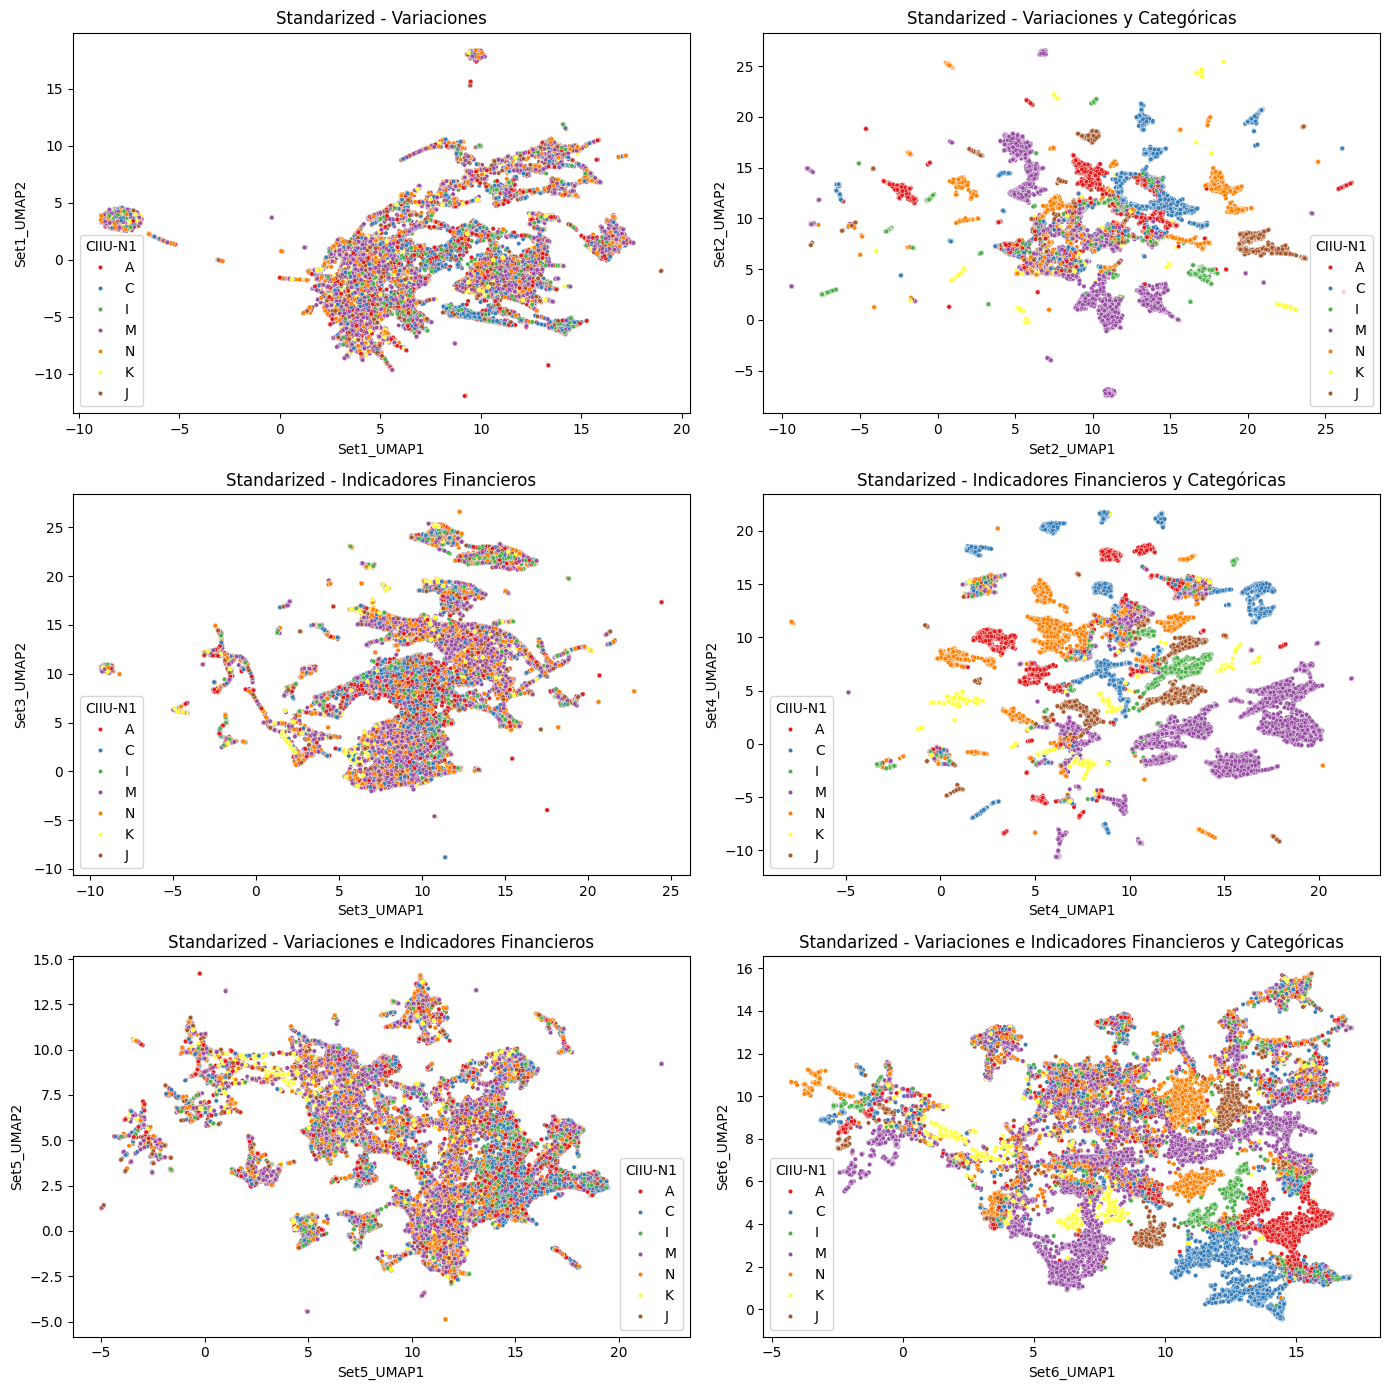

In [6]:
var_st_set1_to_umap = ['VAR_ACTIVO', 'VAR_INVENTARIOS', 'VAR_PASIVO', 'VAR_INGRESOS', 'VAR_COSTO_VENTAS_PRODUCCION', 'VAR_GASTOS', 'VAR_UTILIDAD_OPERATIVA', 'VAR_IMPUESTO_RENTA', 'VAR_UTILIDAD_NETA']


var_st_set2_to_umap = ['VAR_ACTIVO', 'VAR_INVENTARIOS', 'VAR_PASIVO', 'VAR_INGRESOS', 'VAR_COSTO_VENTAS_PRODUCCION', 'VAR_GASTOS', 'VAR_UTILIDAD_OPERATIVA', 'VAR_IMPUESTO_RENTA', 'VAR_UTILIDAD_NETA',
                       'REGION_COSTA','REGION_GALÁPAGOS','REGION_ORIENTE','REGION_SIERRA',
                       'CIIU_NIVEL_1_A', 'CIIU_NIVEL_1_C', 'CIIU_NIVEL_1_I', 'CIIU_NIVEL_1_J', 'CIIU_NIVEL_1_K', 'CIIU_NIVEL_1_M', 'CIIU_NIVEL_1_N',
                       'SEGMENTO_ENCODED']

var_st_set3_to_umap = ['IF_PRUEBA_ACIDA','IF_ENDEUDAMIENTO_ACTIVO','IF_APALANCAMIENTO','IF_ROTACION_VENTAS','IF_MARGEN_BRUTO','IF_MARGEN_OPERACIONAL','IF_MARGEN_NETO','IF_ROE','IF_ROA']

var_st_set4_to_umap = ['IF_PRUEBA_ACIDA','IF_ENDEUDAMIENTO_ACTIVO','IF_APALANCAMIENTO','IF_ROTACION_VENTAS','IF_MARGEN_BRUTO','IF_MARGEN_OPERACIONAL','IF_MARGEN_NETO','IF_ROE','IF_ROA',
                      'REGION_COSTA','REGION_GALÁPAGOS','REGION_ORIENTE','REGION_SIERRA',
                      'CIIU_NIVEL_1_A', 'CIIU_NIVEL_1_C', 'CIIU_NIVEL_1_I', 'CIIU_NIVEL_1_J', 'CIIU_NIVEL_1_K', 'CIIU_NIVEL_1_M', 'CIIU_NIVEL_1_N',
                      'SEGMENTO_ENCODED']

var_st_set5_to_umap = ['VAR_ACTIVO', 'VAR_INVENTARIOS', 'VAR_PASIVO', 'VAR_INGRESOS', 'VAR_COSTO_VENTAS_PRODUCCION', 'VAR_GASTOS', 'VAR_UTILIDAD_OPERATIVA', 'VAR_IMPUESTO_RENTA', 'VAR_UTILIDAD_NETA',
                      'IF_PRUEBA_ACIDA','IF_ENDEUDAMIENTO_ACTIVO','IF_APALANCAMIENTO','IF_ROTACION_VENTAS','IF_MARGEN_BRUTO','IF_MARGEN_OPERACIONAL','IF_MARGEN_NETO','IF_ROE','IF_ROA']

var_st_set6_to_umap = ['VAR_ACTIVO', 'VAR_INVENTARIOS', 'VAR_PASIVO', 'VAR_INGRESOS', 'VAR_COSTO_VENTAS_PRODUCCION', 'VAR_GASTOS', 'VAR_UTILIDAD_OPERATIVA', 'VAR_IMPUESTO_RENTA', 'VAR_UTILIDAD_NETA',
                      'IF_PRUEBA_ACIDA','IF_ENDEUDAMIENTO_ACTIVO','IF_APALANCAMIENTO','IF_ROTACION_VENTAS','IF_MARGEN_BRUTO','IF_MARGEN_OPERACIONAL','IF_MARGEN_NETO','IF_ROE','IF_ROA',
                      'REGION_COSTA','REGION_GALÁPAGOS','REGION_ORIENTE','REGION_SIERRA',
                      'CIIU_NIVEL_1_A', 'CIIU_NIVEL_1_C', 'CIIU_NIVEL_1_I', 'CIIU_NIVEL_1_J', 'CIIU_NIVEL_1_K', 'CIIU_NIVEL_1_M', 'CIIU_NIVEL_1_N',
                      'SEGMENTO_ENCODED']


pd_companias_standar_with_umap_set_1 = generar_2_umap(pd_companias_standardized, var_st_set1_to_umap, 'Set1_UMAP1', 'Set1_UMAP2')
pd_companias_standar_with_umap_set_2 = generar_2_umap(pd_companias_standardized, var_st_set2_to_umap, 'Set2_UMAP1', 'Set2_UMAP2')
pd_companias_standar_with_umap_set_3 = generar_2_umap(pd_companias_standardized, var_st_set3_to_umap, 'Set3_UMAP1', 'Set3_UMAP2')
pd_companias_standar_with_umap_set_4 = generar_2_umap(pd_companias_standardized, var_st_set4_to_umap, 'Set4_UMAP1', 'Set4_UMAP2')
pd_companias_standar_with_umap_set_5 = generar_2_umap(pd_companias_standardized, var_st_set5_to_umap, 'Set5_UMAP1', 'Set5_UMAP2')
pd_companias_standar_with_umap_set_6 = generar_2_umap(pd_companias_standardized, var_st_set6_to_umap, 'Set6_UMAP1', 'Set6_UMAP2')

fig, axes = plt.subplots(3, 2, figsize=(14, 14))  # 3 fila y 2 columnas

# Primer gráfico
sns.scatterplot(x='Set1_UMAP1', y='Set1_UMAP2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_umap_set_1, palette='Set1', s=10, ax=axes[0, 0])
axes[0, 0].set_title('Standarized - Variaciones')
axes[0, 0].legend(title="CIIU-N1")

sns.scatterplot(x='Set2_UMAP1', y='Set2_UMAP2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_umap_set_2, palette='Set1', s=10, ax=axes[0, 1])
axes[0, 1].set_title('Standarized - Variaciones y Categóricas')
axes[0, 1].legend(title="CIIU-N1")

sns.scatterplot(x='Set3_UMAP1', y='Set3_UMAP2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_umap_set_3, palette='Set1', s=10, ax=axes[1, 0])
axes[1, 0].set_title('Standarized - Indicadores Financieros')
axes[1, 0].legend(title="CIIU-N1")

sns.scatterplot(x='Set4_UMAP1', y='Set4_UMAP2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_umap_set_4, palette='Set1', s=10, ax=axes[1, 1])
axes[1, 1].set_title('Standarized - Indicadores Financieros y Categóricas')
axes[1, 1].legend(title="CIIU-N1")

sns.scatterplot(x='Set5_UMAP1', y='Set5_UMAP2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_umap_set_5, palette='Set1', s=10, ax=axes[2, 0])
axes[2, 0].set_title('Standarized - Variaciones e Indicadores Financieros')
axes[2, 0].legend(title="CIIU-N1")

sns.scatterplot(x='Set6_UMAP1', y='Set6_UMAP2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_umap_set_6, palette='Set1', s=10, ax=axes[2, 1])
axes[2, 1].set_title('Standarized - Variaciones e Indicadores Financieros y Categóricas')
axes[2, 1].legend(title="CIIU-N1")

plt.tight_layout()
plt.show()



### Experimento 2 - UMAP - Cuentas de 2022 y 2023

c:\Users\fabrizio\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\fabrizio\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\fabrizio\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\fabrizio\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\fabrizio\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism

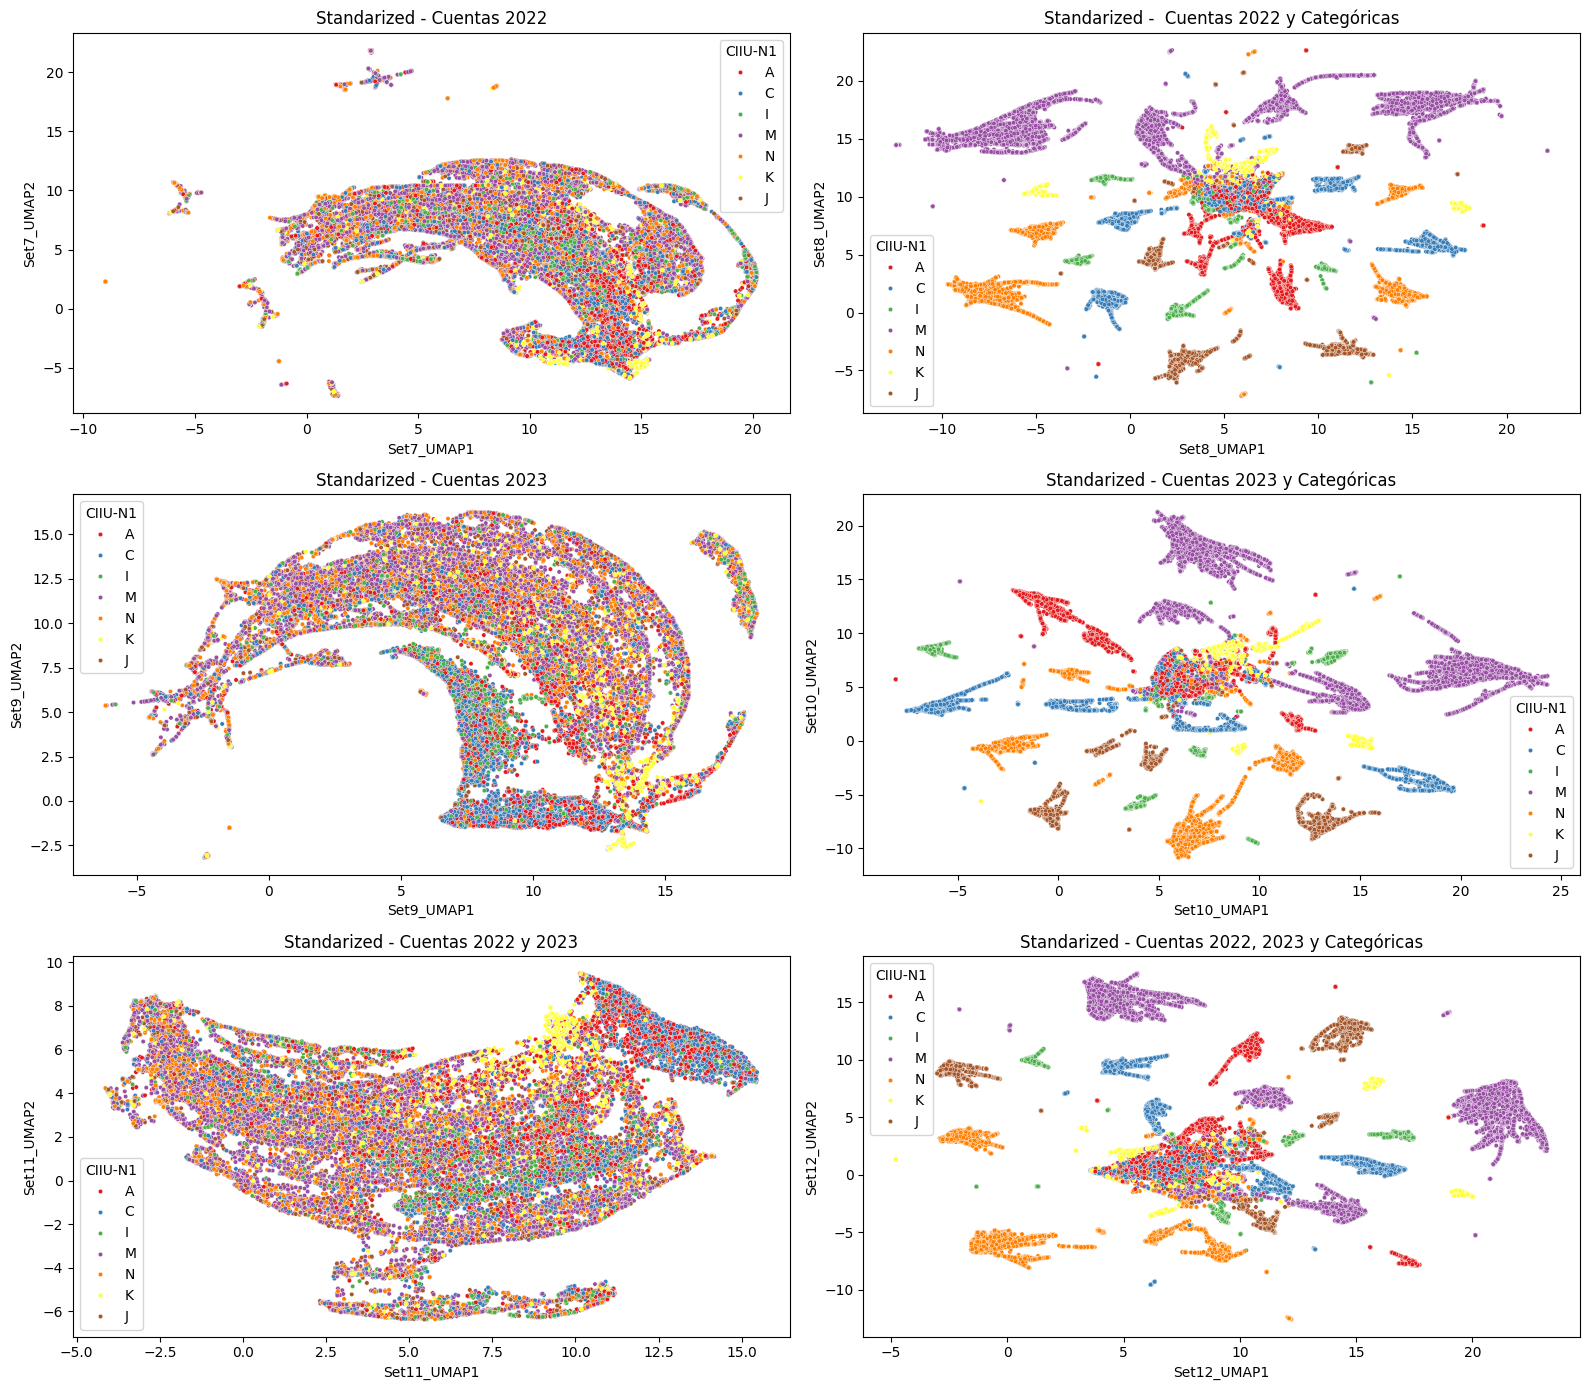

In [7]:
var_st_set7_to_umap = ['ACTIVO_2022', 'ACTIVO_CORRIENTE_2022', 'INVENTARIOS_2022', 'ACTIVOS_NO_CORRIENTES_2022', 'PASIVO_2022', 'PASIVO_CORRIENTE_2022', 'PASIVO_NO_CORRIENTE_2022', 'PATRIMONIO_NETO_2022',
                      'INGRESOS_ACTIVIDADES_ORDINARIAS_2022', 'GANANCIA_BRUTA_2022', 'OTROS_INGRESOS_2022', 'COSTO_VENTAS_PRODUCCION_2022', 'GASTOS_2022',
                      'UTILIDAD_OPERATIVA_2022', 'IMPUESTO_RENTA_2022','UTILIDAD_NETA_2022']

var_st_set8_to_umap = ['ACTIVO_2022', 'ACTIVO_CORRIENTE_2022', 'INVENTARIOS_2022', 'ACTIVOS_NO_CORRIENTES_2022', 'PASIVO_2022', 'PASIVO_CORRIENTE_2022', 'PASIVO_NO_CORRIENTE_2022', 'PATRIMONIO_NETO_2022',
                      'INGRESOS_ACTIVIDADES_ORDINARIAS_2022', 'GANANCIA_BRUTA_2022', 'OTROS_INGRESOS_2022', 'COSTO_VENTAS_PRODUCCION_2022', 'GASTOS_2022',
                      'UTILIDAD_OPERATIVA_2022', 'IMPUESTO_RENTA_2022','UTILIDAD_NETA_2022',
                      'REGION_COSTA','REGION_GALÁPAGOS','REGION_ORIENTE','REGION_SIERRA',
                      'CIIU_NIVEL_1_A', 'CIIU_NIVEL_1_C', 'CIIU_NIVEL_1_I', 'CIIU_NIVEL_1_J', 'CIIU_NIVEL_1_K', 'CIIU_NIVEL_1_M', 'CIIU_NIVEL_1_N', 'SEGMENTO_ENCODED']

var_st_set9_to_umap = ['ACTIVO_2023', 'ACTIVO_CORRIENTE_2023', 'INVENTARIOS_2023', 'ACTIVOS_NO_CORRIENTES_2023', 'PASIVO_2023', 'PASIVO_CORRIENTE_2023', 'PASIVO_NO_CORRIENTE_2023', 'PATRIMONIO_NETO_2023',
                      'INGRESOS_ACTIVIDADES_ORDINARIAS_2023', 'GANANCIA_BRUTA_2023', 'OTROS_INGRESOS_2023', 'COSTO_VENTAS_PRODUCCION_2023', 'GASTOS_2023',
                      'UTILIDAD_OPERATIVA_2023', 'IMPUESTO_RENTA_2023','UTILIDAD_NETA_2023']

var_st_set10_to_umap = ['ACTIVO_2023', 'ACTIVO_CORRIENTE_2023', 'INVENTARIOS_2023', 'ACTIVOS_NO_CORRIENTES_2023', 'PASIVO_2023', 'PASIVO_CORRIENTE_2023', 'PASIVO_NO_CORRIENTE_2023', 'PATRIMONIO_NETO_2023',
                      'INGRESOS_ACTIVIDADES_ORDINARIAS_2023', 'GANANCIA_BRUTA_2023', 'OTROS_INGRESOS_2023', 'COSTO_VENTAS_PRODUCCION_2023', 'GASTOS_2023',
                      'UTILIDAD_OPERATIVA_2023', 'IMPUESTO_RENTA_2023','UTILIDAD_NETA_2023',
                      'REGION_COSTA','REGION_GALÁPAGOS','REGION_ORIENTE','REGION_SIERRA',
                      'CIIU_NIVEL_1_A', 'CIIU_NIVEL_1_C', 'CIIU_NIVEL_1_I', 'CIIU_NIVEL_1_J', 'CIIU_NIVEL_1_K', 'CIIU_NIVEL_1_M', 'CIIU_NIVEL_1_N', 'SEGMENTO_ENCODED']

var_st_set11_to_umap = ['ACTIVO_2022', 'ACTIVO_CORRIENTE_2022', 'INVENTARIOS_2022', 'ACTIVOS_NO_CORRIENTES_2022', 'PASIVO_2022', 'PASIVO_CORRIENTE_2022', 'PASIVO_NO_CORRIENTE_2022', 'PATRIMONIO_NETO_2022',
                      'INGRESOS_ACTIVIDADES_ORDINARIAS_2022', 'GANANCIA_BRUTA_2022', 'OTROS_INGRESOS_2022', 'COSTO_VENTAS_PRODUCCION_2022', 'GASTOS_2022',
                      'UTILIDAD_OPERATIVA_2022', 'IMPUESTO_RENTA_2022','UTILIDAD_NETA_2022',
                      'ACTIVO_2023', 'ACTIVO_CORRIENTE_2023', 'INVENTARIOS_2023', 'ACTIVOS_NO_CORRIENTES_2023', 'PASIVO_2023', 'PASIVO_CORRIENTE_2023', 'PASIVO_NO_CORRIENTE_2023', 'PATRIMONIO_NETO_2023',
                      'INGRESOS_ACTIVIDADES_ORDINARIAS_2023', 'GANANCIA_BRUTA_2023', 'OTROS_INGRESOS_2023', 'COSTO_VENTAS_PRODUCCION_2023', 'GASTOS_2023',
                      'UTILIDAD_OPERATIVA_2023', 'IMPUESTO_RENTA_2023','UTILIDAD_NETA_2023']

var_st_set12_to_umap = ['ACTIVO_2022', 'ACTIVO_CORRIENTE_2022', 'INVENTARIOS_2022', 'ACTIVOS_NO_CORRIENTES_2022', 'PASIVO_2022', 'PASIVO_CORRIENTE_2022', 'PASIVO_NO_CORRIENTE_2022', 'PATRIMONIO_NETO_2022',
                      'INGRESOS_ACTIVIDADES_ORDINARIAS_2022', 'GANANCIA_BRUTA_2022', 'OTROS_INGRESOS_2022', 'COSTO_VENTAS_PRODUCCION_2022', 'GASTOS_2022',
                      'UTILIDAD_OPERATIVA_2022', 'IMPUESTO_RENTA_2022','UTILIDAD_NETA_2022',
                      'ACTIVO_2023', 'ACTIVO_CORRIENTE_2023', 'INVENTARIOS_2023', 'ACTIVOS_NO_CORRIENTES_2023', 'PASIVO_2023', 'PASIVO_CORRIENTE_2023', 'PASIVO_NO_CORRIENTE_2023', 'PATRIMONIO_NETO_2023',
                      'INGRESOS_ACTIVIDADES_ORDINARIAS_2023', 'GANANCIA_BRUTA_2023', 'OTROS_INGRESOS_2023', 'COSTO_VENTAS_PRODUCCION_2023', 'GASTOS_2023',
                      'UTILIDAD_OPERATIVA_2023', 'IMPUESTO_RENTA_2023','UTILIDAD_NETA_2023',
                      'REGION_COSTA','REGION_GALÁPAGOS','REGION_ORIENTE','REGION_SIERRA',
                      'CIIU_NIVEL_1_A', 'CIIU_NIVEL_1_C', 'CIIU_NIVEL_1_I', 'CIIU_NIVEL_1_J', 'CIIU_NIVEL_1_K', 'CIIU_NIVEL_1_M', 'CIIU_NIVEL_1_N', 'SEGMENTO_ENCODED']


pd_companias_standar_with_umap_set_7 = generar_2_umap(pd_companias_standardized, var_st_set7_to_umap, 'Set7_UMAP1', 'Set7_UMAP2')
pd_companias_standar_with_umap_set_8 = generar_2_umap(pd_companias_standardized, var_st_set8_to_umap, 'Set8_UMAP1', 'Set8_UMAP2')
pd_companias_standar_with_umap_set_9 = generar_2_umap(pd_companias_standardized, var_st_set9_to_umap, 'Set9_UMAP1', 'Set9_UMAP2')
pd_companias_standar_with_umap_set_10 = generar_2_umap(pd_companias_standardized, var_st_set10_to_umap, 'Set10_UMAP1', 'Set10_UMAP2')
pd_companias_standar_with_umap_set_11 = generar_2_umap(pd_companias_standardized, var_st_set11_to_umap, 'Set11_UMAP1', 'Set11_UMAP2')
pd_companias_standar_with_umap_set_12 = generar_2_umap(pd_companias_standardized, var_st_set12_to_umap, 'Set12_UMAP1', 'Set12_UMAP2')



fig, axes = plt.subplots(3, 2, figsize=(16, 14))  # 1 fila y 2 columnas

# Primer gráfico
sns.scatterplot(x='Set7_UMAP1', y='Set7_UMAP2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_umap_set_7, palette='Set1', s=10, ax=axes[0, 0])
axes[0, 0].set_title('Standarized - Cuentas 2022')
axes[0, 0].legend(title="CIIU-N1")
# axes[0, 0].set_ylim(-7, 15)
# axes[0, 0].set_xlim(-5, 25)

sns.scatterplot(x='Set8_UMAP1', y='Set8_UMAP2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_umap_set_8, palette='Set1', s=10, ax=axes[0, 1])
axes[0, 1].set_title('Standarized -  Cuentas 2022 y Categóricas')
axes[0, 1].legend(title="CIIU-N1")
# axes[0, 1].set_ylim(-7, 15)
# axes[0, 1].set_xlim(-5, 25)

sns.scatterplot(x='Set9_UMAP1', y='Set9_UMAP2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_umap_set_9, palette='Set1', s=10, ax=axes[1, 0])
axes[1, 0].set_title('Standarized - Cuentas 2023')
axes[1, 0].legend(title="CIIU-N1")
# axes[1, 0].set_ylim(-5, 15)
# axes[1, 0].set_xlim(-5, 25)

sns.scatterplot(x='Set10_UMAP1', y='Set10_UMAP2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_umap_set_10, palette='Set1', s=10, ax=axes[1, 1])
axes[1, 1].set_title('Standarized - Cuentas 2023 y Categóricas')
axes[1, 1].legend(title="CIIU-N1")
# axes[1, 1].set_ylim(-5, 10)
# axes[1, 1].set_xlim(-2, 20)

sns.scatterplot(x='Set11_UMAP1', y='Set11_UMAP2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_umap_set_11, palette='Set1', s=10, ax=axes[2, 0])
axes[2, 0].set_title('Standarized - Cuentas 2022 y 2023')
axes[2, 0].legend(title="CIIU-N1")
# axes[1, 0].set_ylim(-5, 10)
# axes[1, 0].set_xlim(-2, 20)

sns.scatterplot(x='Set12_UMAP1', y='Set12_UMAP2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_umap_set_12, palette='Set1', s=10, ax=axes[2, 1])
axes[2, 1].set_title('Standarized - Cuentas 2022, 2023 y Categóricas')
axes[2, 1].legend(title="CIIU-N1")
# axes[1, 1].set_ylim(-5, 10)
# axes[1, 1].set_xlim(-2, 20)

plt.tight_layout()
plt.show()


### Experimento 3 - UMAP - Combinación Completa

c:\Users\fabrizio\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\fabrizio\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\fabrizio\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\fabrizio\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


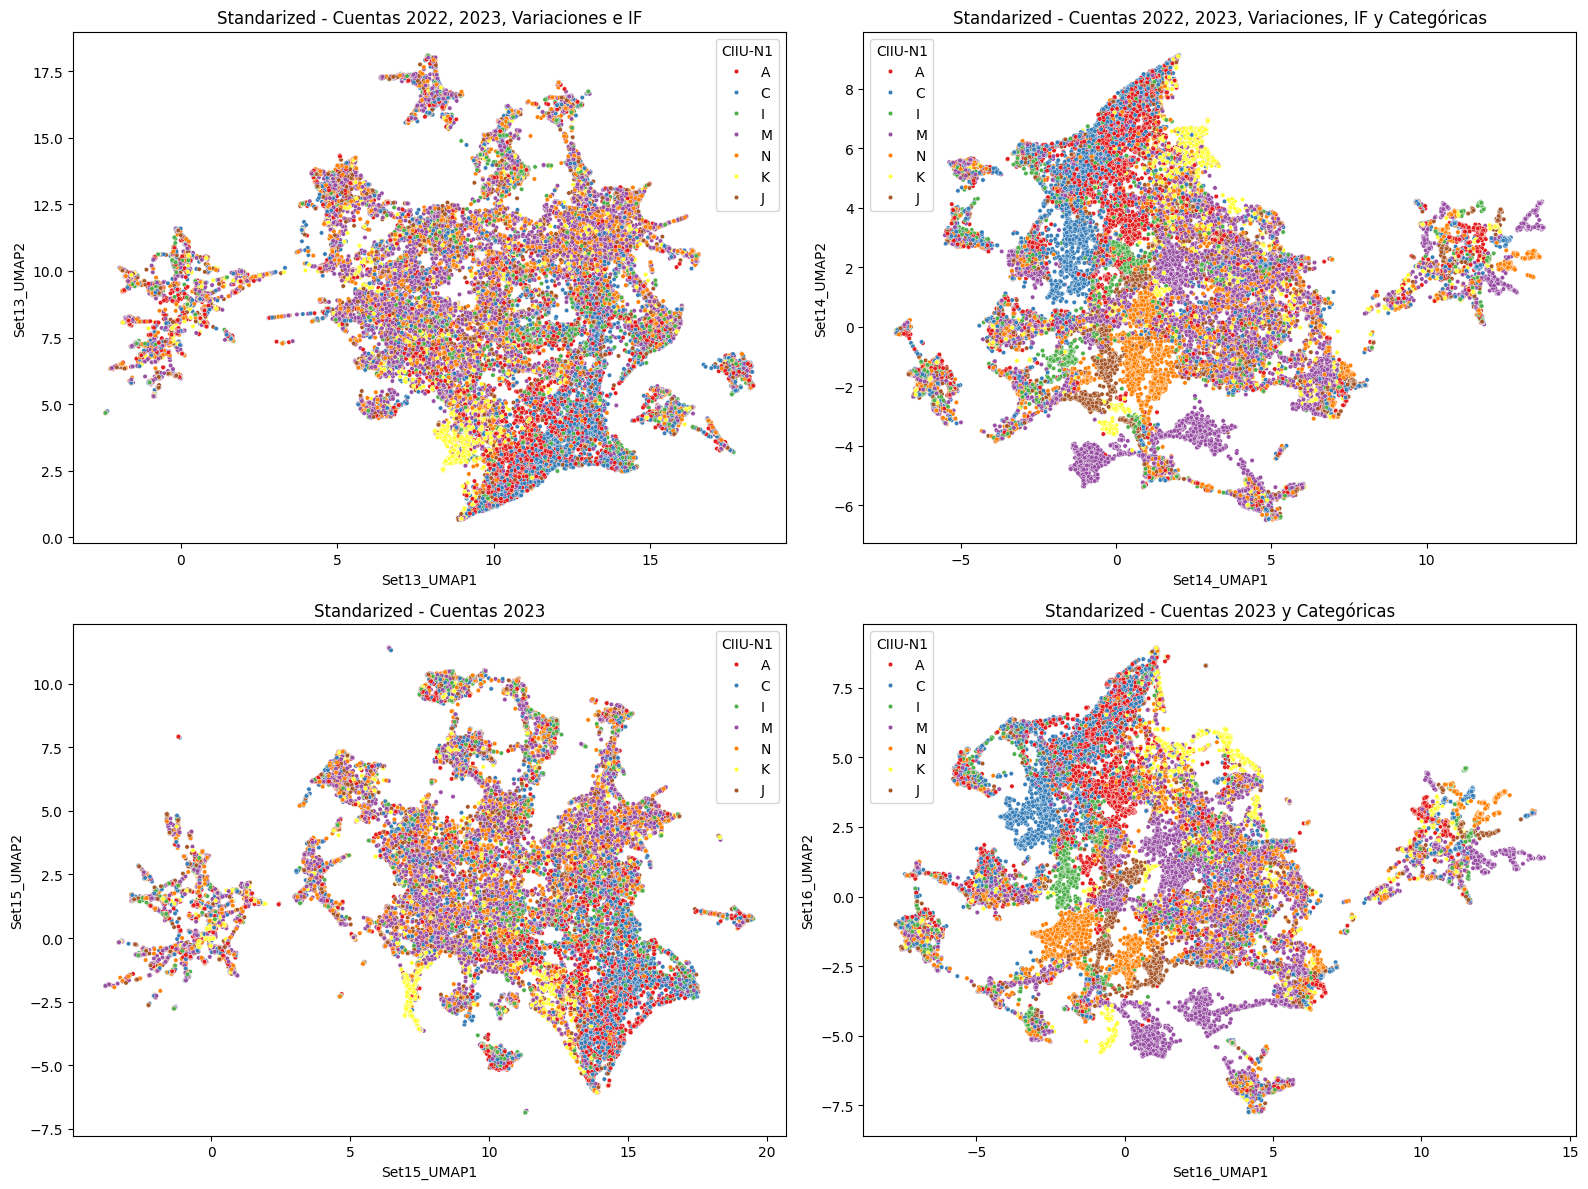

In [8]:
var_st_set13_to_umap = ['ACTIVO_2022', 'ACTIVO_CORRIENTE_2022', 'INVENTARIOS_2022', 'ACTIVOS_NO_CORRIENTES_2022', 'PASIVO_2022', 'PASIVO_CORRIENTE_2022', 'PASIVO_NO_CORRIENTE_2022', 'PATRIMONIO_NETO_2022',
                      'INGRESOS_ACTIVIDADES_ORDINARIAS_2022', 'GANANCIA_BRUTA_2022', 'OTROS_INGRESOS_2022', 'COSTO_VENTAS_PRODUCCION_2022', 'GASTOS_2022',
                      'UTILIDAD_OPERATIVA_2022', 'IMPUESTO_RENTA_2022','UTILIDAD_NETA_2022',
                      'ACTIVO_2023', 'ACTIVO_CORRIENTE_2023', 'INVENTARIOS_2023', 'ACTIVOS_NO_CORRIENTES_2023', 'PASIVO_2023', 'PASIVO_CORRIENTE_2023', 'PASIVO_NO_CORRIENTE_2023', 'PATRIMONIO_NETO_2023',
                      'INGRESOS_ACTIVIDADES_ORDINARIAS_2023', 'GANANCIA_BRUTA_2023', 'OTROS_INGRESOS_2023', 'COSTO_VENTAS_PRODUCCION_2023', 'GASTOS_2023',
                      'UTILIDAD_OPERATIVA_2023', 'IMPUESTO_RENTA_2023','UTILIDAD_NETA_2023',
                      'VAR_ACTIVO', 'VAR_INVENTARIOS', 'VAR_PASIVO', 'VAR_INGRESOS', 'VAR_COSTO_VENTAS_PRODUCCION', 'VAR_GASTOS', 'VAR_UTILIDAD_OPERATIVA', 'VAR_IMPUESTO_RENTA', 'VAR_UTILIDAD_NETA',
                      'IF_PRUEBA_ACIDA','IF_ENDEUDAMIENTO_ACTIVO','IF_APALANCAMIENTO','IF_ROTACION_VENTAS','IF_MARGEN_BRUTO','IF_MARGEN_OPERACIONAL','IF_MARGEN_NETO','IF_ROE','IF_ROA',
                      ]

var_st_set14_to_umap = ['ACTIVO_2022', 'ACTIVO_CORRIENTE_2022', 'INVENTARIOS_2022', 'ACTIVOS_NO_CORRIENTES_2022', 'PASIVO_2022', 'PASIVO_CORRIENTE_2022', 'PASIVO_NO_CORRIENTE_2022', 'PATRIMONIO_NETO_2022',
                      'INGRESOS_ACTIVIDADES_ORDINARIAS_2022', 'GANANCIA_BRUTA_2022', 'OTROS_INGRESOS_2022', 'COSTO_VENTAS_PRODUCCION_2022', 'GASTOS_2022',
                      'UTILIDAD_OPERATIVA_2022', 'IMPUESTO_RENTA_2022','UTILIDAD_NETA_2022',
                      'ACTIVO_2023', 'ACTIVO_CORRIENTE_2023', 'INVENTARIOS_2023', 'ACTIVOS_NO_CORRIENTES_2023', 'PASIVO_2023', 'PASIVO_CORRIENTE_2023', 'PASIVO_NO_CORRIENTE_2023', 'PATRIMONIO_NETO_2023',
                      'INGRESOS_ACTIVIDADES_ORDINARIAS_2023', 'GANANCIA_BRUTA_2023', 'OTROS_INGRESOS_2023', 'COSTO_VENTAS_PRODUCCION_2023', 'GASTOS_2023',
                      'UTILIDAD_OPERATIVA_2023', 'IMPUESTO_RENTA_2023','UTILIDAD_NETA_2023',
                      'VAR_ACTIVO', 'VAR_INVENTARIOS', 'VAR_PASIVO', 'VAR_INGRESOS', 'VAR_COSTO_VENTAS_PRODUCCION', 'VAR_GASTOS', 'VAR_UTILIDAD_OPERATIVA', 'VAR_IMPUESTO_RENTA', 'VAR_UTILIDAD_NETA',
                      'IF_PRUEBA_ACIDA','IF_ENDEUDAMIENTO_ACTIVO','IF_APALANCAMIENTO','IF_ROTACION_VENTAS','IF_MARGEN_BRUTO','IF_MARGEN_OPERACIONAL','IF_MARGEN_NETO','IF_ROE','IF_ROA',
                      'REGION_COSTA','REGION_GALÁPAGOS','REGION_ORIENTE','REGION_SIERRA',
                      'CIIU_NIVEL_1_A', 'CIIU_NIVEL_1_C', 'CIIU_NIVEL_1_I', 'CIIU_NIVEL_1_J', 'CIIU_NIVEL_1_K', 'CIIU_NIVEL_1_M', 'CIIU_NIVEL_1_N',
                      'SEGMENTO_ENCODED']

var_st_set15_to_umap = ['ACTIVO_2023', 'ACTIVO_CORRIENTE_2023', 'INVENTARIOS_2023', 'ACTIVOS_NO_CORRIENTES_2023', 'PASIVO_2023', 'PASIVO_CORRIENTE_2023', 'PASIVO_NO_CORRIENTE_2023', 'PATRIMONIO_NETO_2023',
                      'INGRESOS_ACTIVIDADES_ORDINARIAS_2023', 'GANANCIA_BRUTA_2023', 'OTROS_INGRESOS_2023', 'COSTO_VENTAS_PRODUCCION_2023', 'GASTOS_2023',
                      'UTILIDAD_OPERATIVA_2023', 'IMPUESTO_RENTA_2023','UTILIDAD_NETA_2023',
                      'VAR_ACTIVO', 'VAR_INVENTARIOS', 'VAR_PASIVO', 'VAR_INGRESOS', 'VAR_COSTO_VENTAS_PRODUCCION', 'VAR_GASTOS', 'VAR_UTILIDAD_OPERATIVA', 'VAR_IMPUESTO_RENTA', 'VAR_UTILIDAD_NETA',
                      'IF_PRUEBA_ACIDA','IF_ENDEUDAMIENTO_ACTIVO','IF_APALANCAMIENTO','IF_ROTACION_VENTAS','IF_MARGEN_BRUTO','IF_MARGEN_OPERACIONAL','IF_MARGEN_NETO','IF_ROE','IF_ROA',
                      ]

var_st_set16_to_umap = ['ACTIVO_2023', 'ACTIVO_CORRIENTE_2023', 'INVENTARIOS_2023', 'ACTIVOS_NO_CORRIENTES_2023', 'PASIVO_2023', 'PASIVO_CORRIENTE_2023', 'PASIVO_NO_CORRIENTE_2023', 'PATRIMONIO_NETO_2023',
                      'INGRESOS_ACTIVIDADES_ORDINARIAS_2023', 'GANANCIA_BRUTA_2023', 'OTROS_INGRESOS_2023', 'COSTO_VENTAS_PRODUCCION_2023', 'GASTOS_2023',
                      'UTILIDAD_OPERATIVA_2023', 'IMPUESTO_RENTA_2023','UTILIDAD_NETA_2023',
                      'VAR_ACTIVO', 'VAR_INVENTARIOS', 'VAR_PASIVO', 'VAR_INGRESOS', 'VAR_COSTO_VENTAS_PRODUCCION', 'VAR_GASTOS', 'VAR_UTILIDAD_OPERATIVA', 'VAR_IMPUESTO_RENTA', 'VAR_UTILIDAD_NETA',
                      'IF_PRUEBA_ACIDA','IF_ENDEUDAMIENTO_ACTIVO','IF_APALANCAMIENTO','IF_ROTACION_VENTAS','IF_MARGEN_BRUTO','IF_MARGEN_OPERACIONAL','IF_MARGEN_NETO','IF_ROE','IF_ROA',
                      'REGION_COSTA','REGION_GALÁPAGOS','REGION_ORIENTE','REGION_SIERRA',
                      'CIIU_NIVEL_1_A', 'CIIU_NIVEL_1_C', 'CIIU_NIVEL_1_I', 'CIIU_NIVEL_1_J', 'CIIU_NIVEL_1_K', 'CIIU_NIVEL_1_M', 'CIIU_NIVEL_1_N',
                      'SEGMENTO_ENCODED']

pd_companias_standar_with_umap_set_13 = generar_2_umap(pd_companias_standardized, var_st_set13_to_umap, 'Set13_UMAP1', 'Set13_UMAP2')
pd_companias_standar_with_umap_set_14 = generar_2_umap(pd_companias_standardized, var_st_set14_to_umap, 'Set14_UMAP1', 'Set14_UMAP2')
pd_companias_standar_with_umap_set_15 = generar_2_umap(pd_companias_standardized, var_st_set15_to_umap, 'Set15_UMAP1', 'Set15_UMAP2')
pd_companias_standar_with_umap_set_16 = generar_2_umap(pd_companias_standardized, var_st_set16_to_umap, 'Set16_UMAP1', 'Set16_UMAP2')


fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 1 fila y 2 columnas

# Primer gráfico
sns.scatterplot(x='Set13_UMAP1', y='Set13_UMAP2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_umap_set_13, palette='Set1', s=10, ax=axes[0, 0])
axes[0, 0].set_title('Standarized - Cuentas 2022, 2023, Variaciones e IF')
axes[0, 0].legend(title="CIIU-N1")
# axes[0, 0].set_ylim(-10, 15)
# axes[0, 0].set_xlim(-5, 7)

sns.scatterplot(x='Set14_UMAP1', y='Set14_UMAP2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_umap_set_14, palette='Set1', s=10, ax=axes[0, 1])
axes[0, 1].set_title('Standarized - Cuentas 2022, 2023, Variaciones, IF y Categóricas')
axes[0, 1].legend(title="CIIU-N1")
# axes[0, 1].set_ylim(-5, 10)
# axes[0, 1].set_xlim(-2, 20)

sns.scatterplot(x='Set15_UMAP1', y='Set15_UMAP2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_umap_set_15, palette='Set1', s=10, ax=axes[1, 0])
axes[1, 0].set_title('Standarized - Cuentas 2023')
axes[1, 0].legend(title="CIIU-N1")
# axes[1, 0].set_ylim(-5, 10)
# axes[1, 0].set_xlim(-2, 20)

sns.scatterplot(x='Set16_UMAP1', y='Set16_UMAP2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_umap_set_16, palette='Set1', s=10, ax=axes[1, 1])
axes[1, 1].set_title('Standarized - Cuentas 2023 y Categóricas')
axes[1, 1].legend(title="CIIU-N1")
# axes[1, 1].set_ylim(-5, 10)
# axes[1, 1].set_xlim(-2, 20)

plt.tight_layout()
plt.show()


### Experimento 4 - PCA - Indicadores Financieros por Regiones
### Seleccionado el dataset SET 4

c:\Users\fabrizio\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\fabrizio\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(19443, 85)


c:\Users\fabrizio\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(17497, 85)


c:\Users\fabrizio\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(626, 85)


c:\Users\fabrizio\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(318, 85)
(37884, 85)


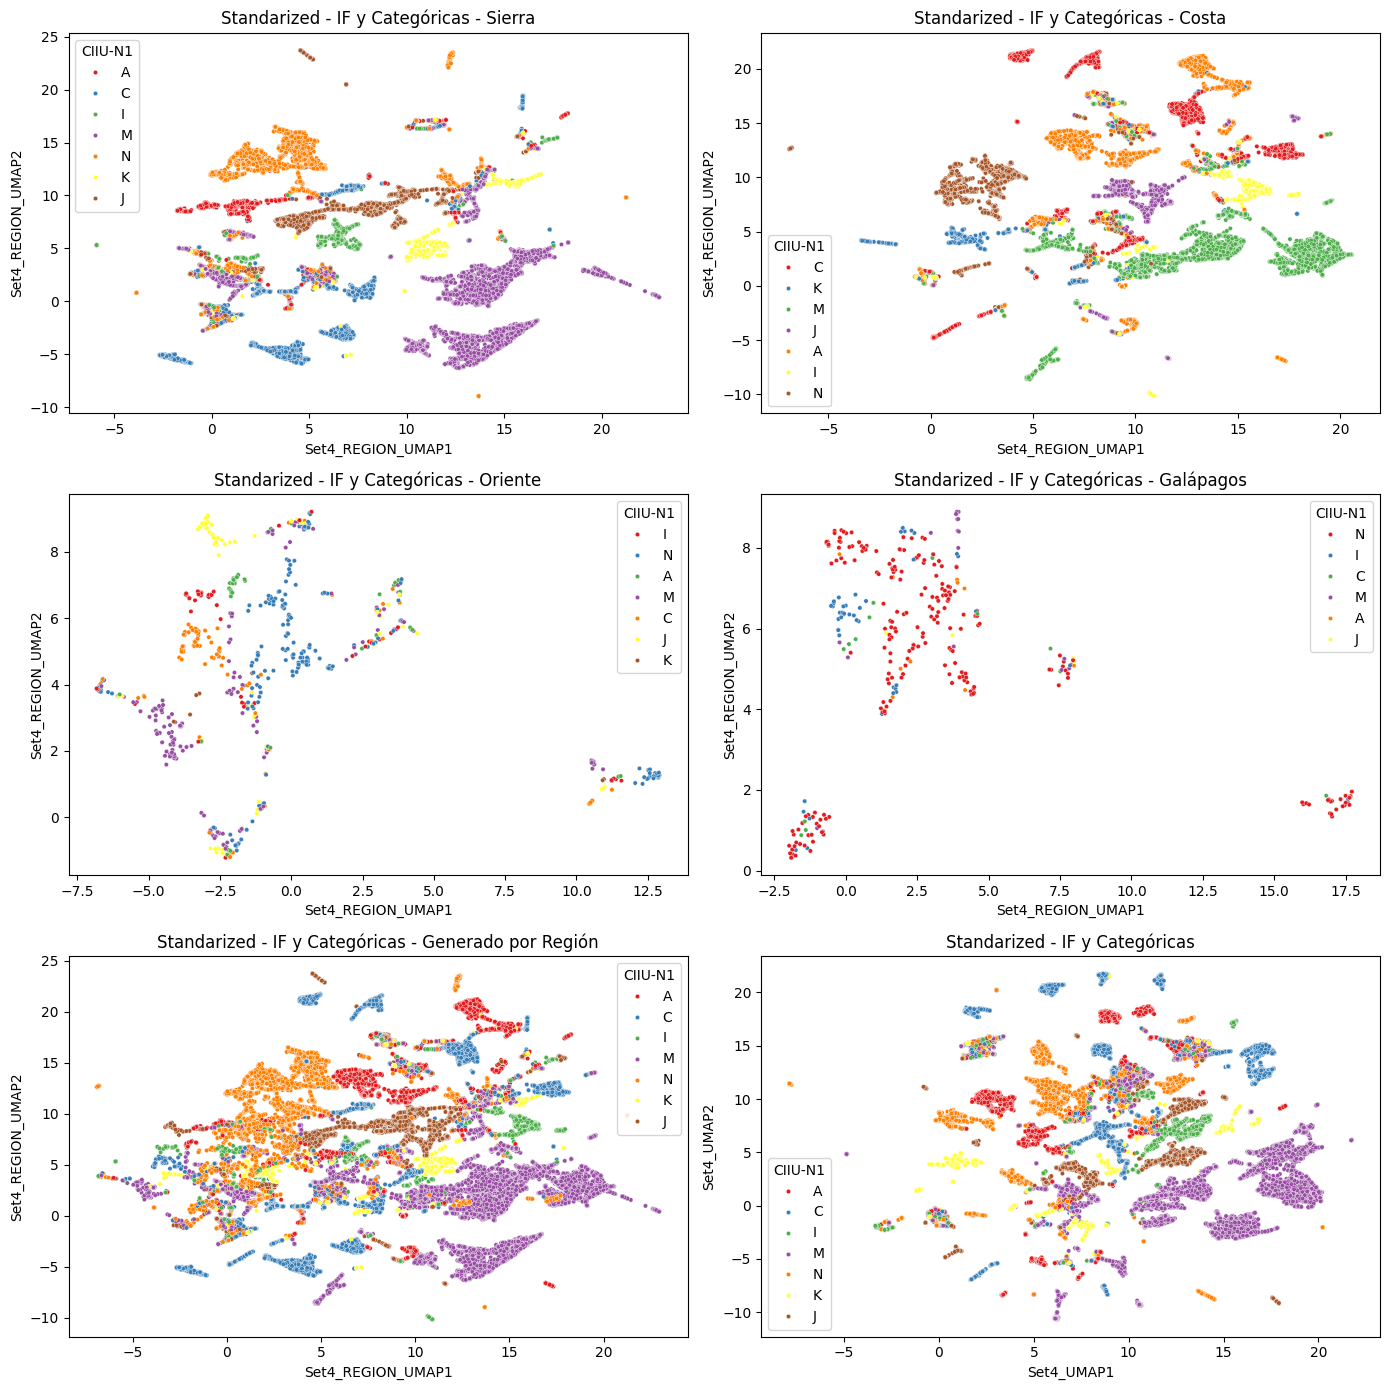

In [9]:
# var_st_set4_to_umap = ['IF_PRUEBA_ACIDA','IF_ENDEUDAMIENTO_ACTIVO','IF_APALANCAMIENTO','IF_ROTACION_VENTAS','IF_MARGEN_BRUTO','IF_MARGEN_OPERCIONAL','IF_MARGEN_NETO','IF_ROE','IF_ROA',
#                       'REGION_COSTA','REGION_GALÁPAGOS','REGION_ORIENTE','REGION_SIERRA',
#                       'CIIU_NIVEL_1_A', 'CIIU_NIVEL_1_C', 'CIIU_NIVEL_1_I', 'CIIU_NIVEL_1_J', 'CIIU_NIVEL_1_K', 'CIIU_NIVEL_1_M', 'CIIU_NIVEL_1_N',
#                       'SEGMENTO_ENCODED']

# Generar PCA con el dataset completo estandarizado
pd_companias_standar_with_umap_set_4 = generar_2_umap(pd_companias_standardized, var_st_set4_to_umap, 'Set4_UMAP1', 'Set4_UMAP2')

# Generar UMAP con el dataset completo estandarizado por Regiones
pd_companias_standardized_sierra = pd_companias_standardized[pd_companias_standardized['REGION']=='SIERRA']
pd_companias_standardized_costa = pd_companias_standardized[pd_companias_standardized['REGION']=='COSTA']
pd_companias_standardized_oriente = pd_companias_standardized[pd_companias_standardized['REGION']=='ORIENTE']
pd_companias_standardized_galapagos = pd_companias_standardized[pd_companias_standardized['REGION']=='GALÁPAGOS']

pd_companias_standar_with_umap_set_4_sierra = generar_2_umap(pd_companias_standardized_sierra, var_st_set4_to_umap, 'Set4_REGION_UMAP1', 'Set4_REGION_UMAP2')
print(pd_companias_standar_with_umap_set_4_sierra.shape)

pd_companias_standar_with_umap_set_4_costa = generar_2_umap(pd_companias_standardized_costa, var_st_set4_to_umap, 'Set4_REGION_UMAP1', 'Set4_REGION_UMAP2')
print(pd_companias_standar_with_umap_set_4_costa.shape)

pd_companias_standar_with_umap_set_4_oriente = generar_2_umap(pd_companias_standardized_oriente, var_st_set4_to_umap, 'Set4_REGION_UMAP1', 'Set4_REGION_UMAP2')
print(pd_companias_standar_with_umap_set_4_oriente.shape)

pd_companias_standar_with_umap_set_4_galapagos = generar_2_umap(pd_companias_standardized_galapagos, var_st_set4_to_umap, 'Set4_REGION_UMAP1', 'Set4_REGION_UMAP2')
print(pd_companias_standar_with_umap_set_4_galapagos.shape)

# Unificar los 4 datasets
pd_companias_standar_with_umap_set_4_region = pd.concat(
    [
        pd_companias_standar_with_umap_set_4_sierra,
        pd_companias_standar_with_umap_set_4_costa,
        pd_companias_standar_with_umap_set_4_oriente,
        pd_companias_standar_with_umap_set_4_galapagos
    ],
    axis=0,  # Combinar filas
    ignore_index=True  # Reindexar el DataFrame resultante
)


# Verificar el tamaño del DataFrame combinado
print(pd_companias_standar_with_umap_set_4_region.shape)

fig, axes = plt.subplots(3, 2, figsize=(14, 14))  # 3 fila y 2 columnas

# Primer gráfico
sns.scatterplot(x='Set4_REGION_UMAP1', y='Set4_REGION_UMAP2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_umap_set_4_sierra, palette='Set1', s=10, ax=axes[0, 0])
axes[0, 0].set_title('Standarized - IF y Categóricas - Sierra')
axes[0, 0].legend(title="CIIU-N1")
# axes[0, 0].set_ylim(-0.05, 0.05)
# axes[0, 0].set_xlim(-2, 10)

sns.scatterplot(x='Set4_REGION_UMAP1', y='Set4_REGION_UMAP2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_umap_set_4_costa, palette='Set1', s=10, ax=axes[0, 1])
axes[0, 1].set_title('Standarized - IF y Categóricas - Costa')
axes[0, 1].legend(title="CIIU-N1")
# axes[0, 1].set_ylim(-0.025, 0.025)
# axes[0, 1].set_xlim(-0.025, 0.025)

sns.scatterplot(x='Set4_REGION_UMAP1', y='Set4_REGION_UMAP2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_umap_set_4_oriente, palette='Set1', s=10, ax=axes[1, 0])
axes[1, 0].set_title('Standarized - IF y Categóricas - Oriente')
axes[1, 0].legend(title="CIIU-N1")
# axes[1, 0].set_ylim(-5, 5)
# axes[1, 0].set_xlim(-10, 50)

sns.scatterplot(x='Set4_REGION_UMAP1', y='Set4_REGION_UMAP2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_umap_set_4_galapagos, palette='Set1', s=10, ax=axes[1, 1])
axes[1, 1].set_title('Standarized - IF y Categóricas - Galápagos')
axes[1, 1].legend(title="CIIU-N1")
# axes[1, 1].set_ylim(-5, 5)
# axes[1, 1].set_xlim(-2, 10)

sns.scatterplot(x='Set4_REGION_UMAP1', y='Set4_REGION_UMAP2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_umap_set_4_region, palette='Set1', s=10, ax=axes[2, 0])
axes[2, 0].set_title('Standarized - IF y Categóricas - Generado por Región')
axes[2, 0].legend(title="CIIU-N1")
# axes[1, 0].set_ylim(-5, 5)
# axes[1, 0].set_xlim(-10, 50)

sns.scatterplot(x='Set4_UMAP1', y='Set4_UMAP2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_umap_set_4, palette='Set1', s=10, ax=axes[2, 1])
axes[2, 1].set_title('Standarized - IF y Categóricas')
axes[2, 1].legend(title="CIIU-N1")
# axes[1, 1].set_ylim(-5, 5)
# axes[1, 1].set_xlim(-2, 10)

plt.tight_layout()
plt.show()

C:\Users\fabrizio\AppData\Local\Temp\ipykernel_1952\2995174396.py:16: UserWarning: The palette list has more values (9) than needed (7), which may not be intended.
  sns.scatterplot(


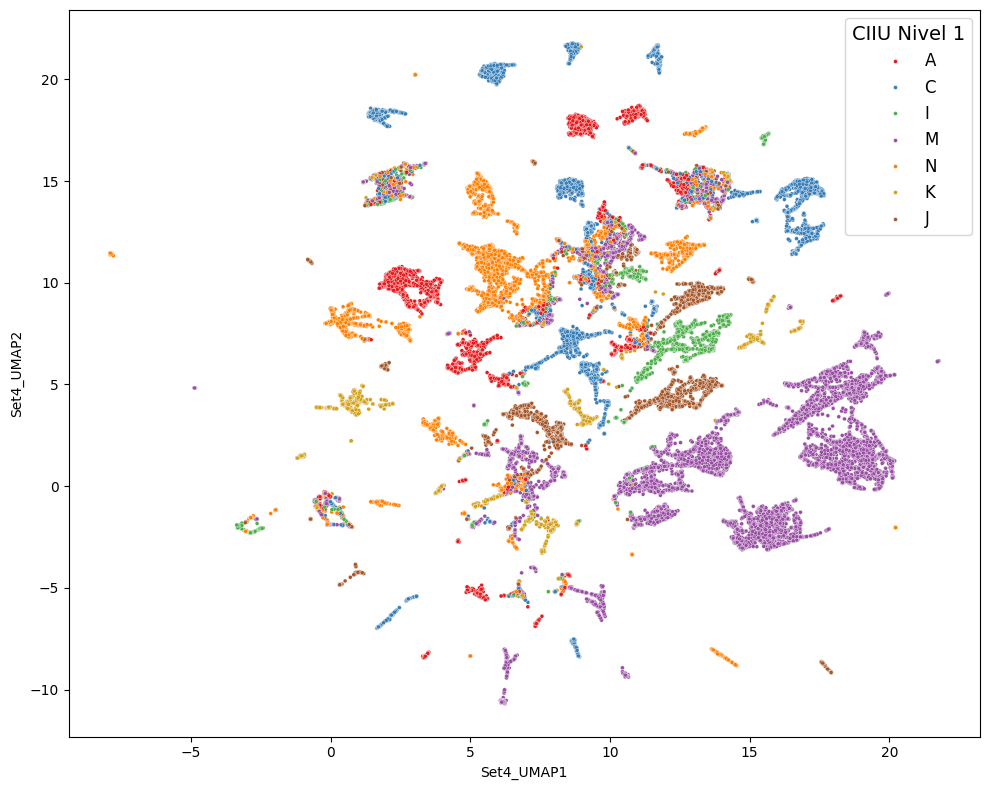

In [10]:
Set1_palette_updated = [
    "#E41A1C",  # Rojo
    "#377EB8",  # Azul
    "#4DAF4A",  # Verde
    "#984EA3",  # Púrpura
    "#FF7F00",  # Naranja
    "#D4A017",  # Amarillo intenso/caramelo
    "#A65628",  # Marrón
    "#F781BF",  # Rosa
    "#999999",  # Gris
]

plt.figure(figsize=(10, 8))  # Tamaño del gráfico

# Crear el scatter plot
sns.scatterplot(
    x='Set4_UMAP1', 
    y='Set4_UMAP2', 
    hue='CIIU_NIVEL_1', 
    data=pd_companias_standar_with_umap_set_4, 
    palette=Set1_palette_updated,
    s=8
)

# Agregar título y leyenda
# plt.title('Gráfico de dispersión de los 2 componentes generados con PCA', fontsize=16)
plt.title('', fontsize=16)
plt.legend(title="CIIU Nivel 1", fontsize=12, title_fontsize=14)

# Ajustar los límites si es necesario (descomenta las siguientes líneas)
# plt.ylim(-5, 5)
# plt.xlim(-2, 10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Experimento 5 - PCA - Segmento Compañia y Cuentas

c:\Users\fabrizio\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\fabrizio\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(20794, 85)


c:\Users\fabrizio\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(11824, 85)


c:\Users\fabrizio\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(3654, 85)


c:\Users\fabrizio\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(1612, 85)
(37884, 85)


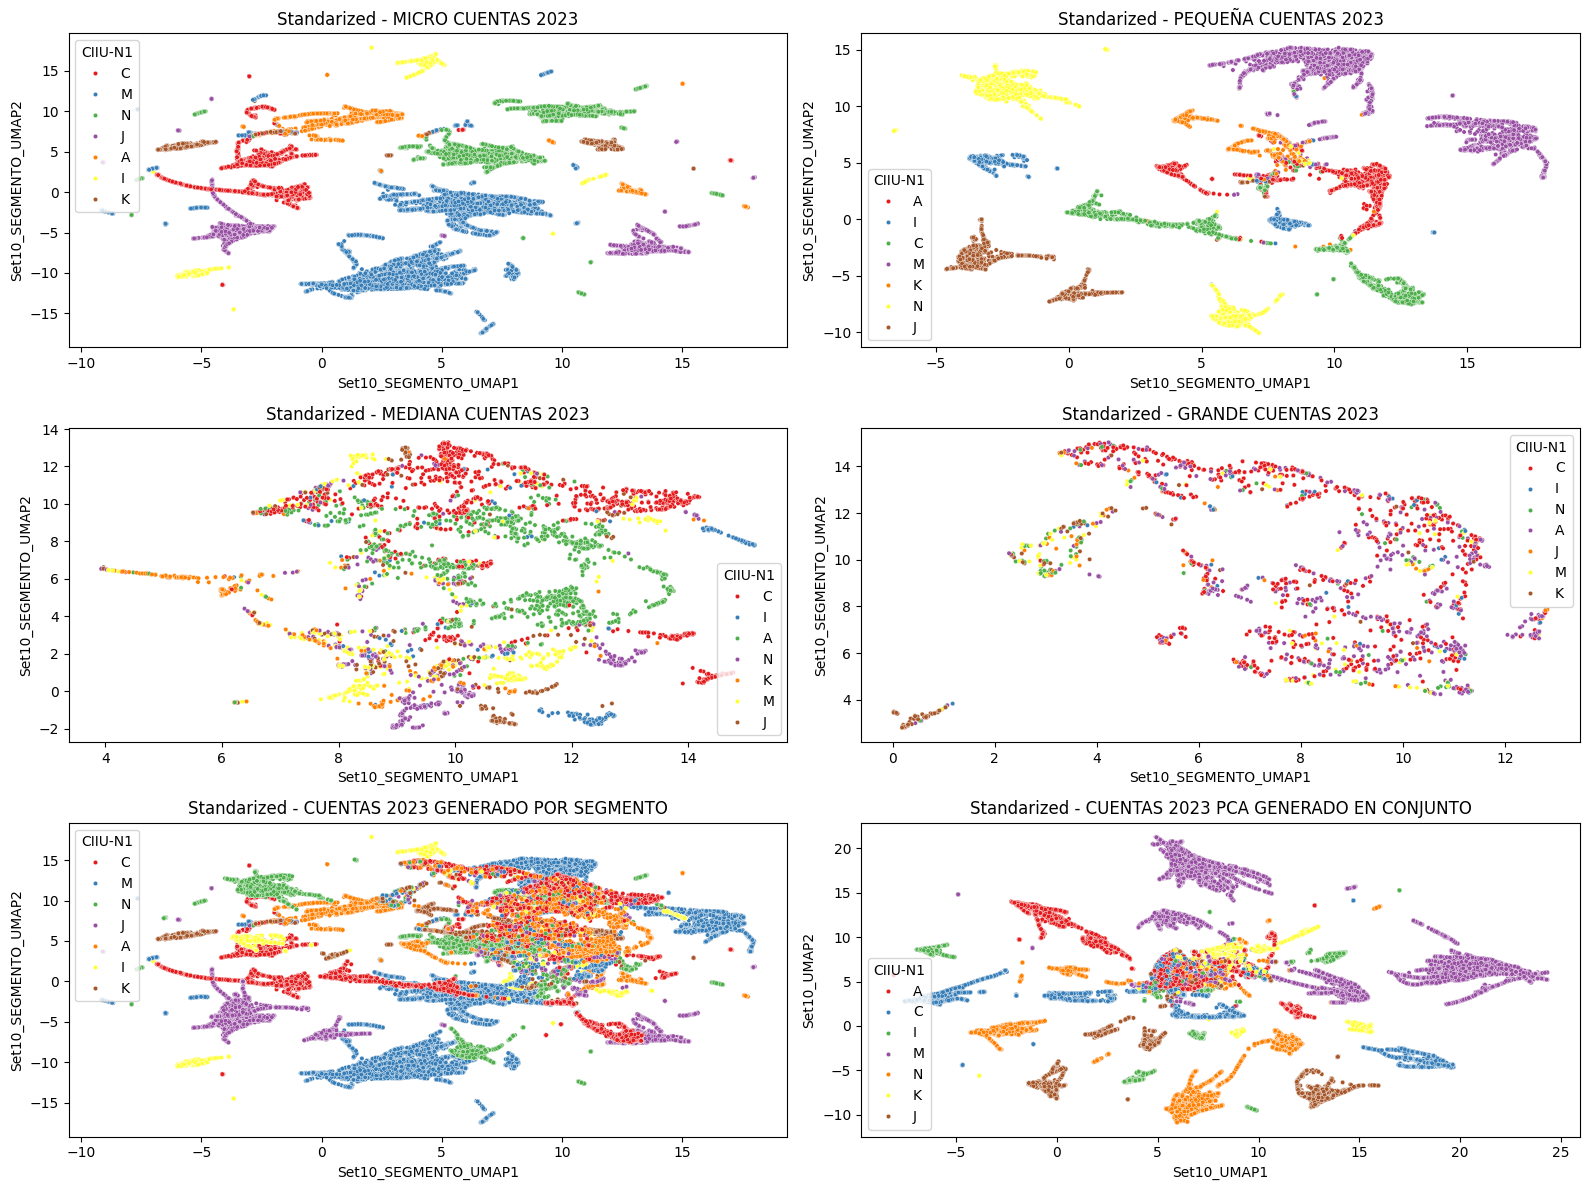

In [11]:
# var_st_set10_to_umap = ['ACTIVO_2023', 'ACTIVO_CORRIENTE_2023', 'INVENTARIOS_2023', 'ACTIVOS_NO_CORRIENTES_2023', 'PASIVO_2023', 'PASIVO_CORRIENTE_2023', 'PASIVO_NO_CORRIENTE_2023', 'PATRIMONIO_NETO_2023',
#                       'INGRESOS_ACTIVIDADES_ORDINARIAS_2023', 'GANANCIA_BRUTA_2023', 'OTROS_INGRESOS_2023', 'COSTO_VENTAS_PRODUCCION_2023', 'GASTOS_2023',
#                       'UTILIDAD_OPERATIVA_2023', 'IMPUESTO_RENTA_2023','UTILIDAD_NETA_2023',
#                       'REGION_COSTA','REGION_GALÁPAGOS','REGION_ORIENTE','REGION_SIERRA',
#                       'CIIU_NIVEL_1_A', 'CIIU_NIVEL_1_C', 'CIIU_NIVEL_1_I', 'CIIU_NIVEL_1_J', 'CIIU_NIVEL_1_K', 'CIIU_NIVEL_1_M', 'CIIU_NIVEL_1_N', 'SEGMENTO_ENCODED']

# Generar PCA con el dataset completo estandarizado
pd_companias_standar_with_umap_set_10 = generar_2_umap(pd_companias_standardized, var_st_set10_to_umap, 'Set10_UMAP1', 'Set10_UMAP2')


# Generar PCA con el dataset completo estandarizado por Regiones
pd_companias_standardized_micro = pd_companias_standardized[pd_companias_standardized['SEGMENTO']=='MICRO']
pd_companias_standardized_pequena = pd_companias_standardized[pd_companias_standardized['SEGMENTO']=='PEQUENA']
pd_companias_standardized_mediana = pd_companias_standardized[pd_companias_standardized['SEGMENTO']=='MEDIANA']
pd_companias_standardized_grande = pd_companias_standardized[pd_companias_standardized['SEGMENTO']=='GRANDE']

pd_companias_standar_with_umap_set_10_micro = generar_2_umap(pd_companias_standardized_micro, var_st_set10_to_umap, 'Set10_SEGMENTO_UMAP1', 'Set10_SEGMENTO_UMAP2')
print(pd_companias_standar_with_umap_set_10_micro.shape)

pd_companias_standar_with_umap_set_10_pequena = generar_2_umap(pd_companias_standardized_pequena, var_st_set10_to_umap, 'Set10_SEGMENTO_UMAP1', 'Set10_SEGMENTO_UMAP2')
print(pd_companias_standar_with_umap_set_10_pequena.shape)

pd_companias_standar_with_umap_set_10_mediana = generar_2_umap(pd_companias_standardized_mediana, var_st_set10_to_umap, 'Set10_SEGMENTO_UMAP1', 'Set10_SEGMENTO_UMAP2')
print(pd_companias_standar_with_umap_set_10_mediana.shape)

pd_companias_standar_with_umap_set_10_grande = generar_2_umap(pd_companias_standardized_grande, var_st_set10_to_umap, 'Set10_SEGMENTO_UMAP1', 'Set10_SEGMENTO_UMAP2')
print(pd_companias_standar_with_umap_set_10_grande.shape)



# Unificar los 3 datasets
pd_companias_standar_with_umap_set_10_segmento = pd.concat(
    [
        pd_companias_standar_with_umap_set_10_micro,
        pd_companias_standar_with_umap_set_10_pequena,
        pd_companias_standar_with_umap_set_10_mediana,
        pd_companias_standar_with_umap_set_10_grande
    ],
    axis=0,  # Combinar filas
    ignore_index=True  # Reindexar el DataFrame resultante
)

# Verificar el tamaño del DataFrame combinado
print(pd_companias_standar_with_umap_set_10_segmento.shape)


fig, axes = plt.subplots(3, 2, figsize=(16, 12))  # 3 fila y 2 columnas

# Primer gráfico
sns.scatterplot(x='Set10_SEGMENTO_UMAP1', y='Set10_SEGMENTO_UMAP2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_umap_set_10_micro, palette='Set1', s=10, ax=axes[0, 0])
axes[0, 0].set_title('Standarized - MICRO CUENTAS 2023')
axes[0, 0].legend(title="CIIU-N1")
# axes[0, 0].set_ylim(-0.05, 0.05)
# axes[0, 0].set_xlim(-2, 10)

sns.scatterplot(x='Set10_SEGMENTO_UMAP1', y='Set10_SEGMENTO_UMAP2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_umap_set_10_pequena, palette='Set1', s=10, ax=axes[0, 1])
axes[0, 1].set_title('Standarized - PEQUEÑA CUENTAS 2023')
axes[0, 1].legend(title="CIIU-N1")
# axes[0, 1].set_ylim(-0.025, 0.025)
# axes[0, 1].set_xlim(-0.025, 0.025)

sns.scatterplot(x='Set10_SEGMENTO_UMAP1', y='Set10_SEGMENTO_UMAP2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_umap_set_10_mediana, palette='Set1', s=10, ax=axes[1, 0])
axes[1, 0].set_title('Standarized - MEDIANA CUENTAS 2023')
axes[1, 0].legend(title="CIIU-N1")
# axes[1, 0].set_ylim(-5, 5)
# axes[1, 0].set_xlim(-10, 50)

sns.scatterplot(x='Set10_SEGMENTO_UMAP1', y='Set10_SEGMENTO_UMAP2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_umap_set_10_grande, palette='Set1', s=10, ax=axes[1, 1])
axes[1, 1].set_title('Standarized - GRANDE CUENTAS 2023')
axes[1, 1].legend(title="CIIU-N1")
# axes[1, 1].set_ylim(-5, 5)
# axes[1, 1].set_xlim(-2, 10)

sns.scatterplot(x='Set10_SEGMENTO_UMAP1', y='Set10_SEGMENTO_UMAP2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_umap_set_10_segmento, palette='Set1', s=10, ax=axes[2, 0])
axes[2, 0].set_title('Standarized - CUENTAS 2023 GENERADO POR SEGMENTO')
axes[2, 0].legend(title="CIIU-N1")
# axes[1, 0].set_ylim(-5, 5)
# axes[1, 0].set_xlim(-10, 50)

sns.scatterplot(x='Set10_UMAP1', y='Set10_UMAP2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_umap_set_10, palette='Set1', s=10, ax=axes[2, 1])
axes[2, 1].set_title('Standarized - CUENTAS 2023 PCA GENERADO EN CONJUNTO')
axes[2, 1].legend(title="CIIU-N1")
# axes[1, 1].set_ylim(-5, 5)
# axes[1, 1].set_xlim(-2, 10)

plt.tight_layout()
plt.show()


## Dataset Seleccionados

+ pd_companias_standar_with_pca_set_4_region 
    + Indicadores Financieros y Variables Categóricas
    + Se pueden observar clusters
    + Este dataset se añade al conjunto principal en la versión generada separada por región

+ pd_companias_standar_with_pca_set_10_region
    + Cuentas 2023 y Variables Categóricas

## Generar Dataset con UMAP

In [12]:
pd_companias.isna().sum()
pd_companias.shape

(37884, 83)

In [13]:
print(pd_companias.shape)
pd_merged = pd_companias
pd_merged = pd.merge(pd_merged, pd_companias_standar_with_umap_set_4[['RUC','Set4_UMAP1', 'Set4_UMAP2']], left_on='RUC', right_on='RUC', how='inner')
print(pd_merged.shape)
# Se comenta porque no es util al generar LQs
pd_merged = pd.merge(pd_merged, pd_companias_standar_with_umap_set_4_region[['RUC','Set4_REGION_UMAP1', 'Set4_REGION_UMAP2']], left_on='RUC', right_on='RUC', how='inner')
print(pd_merged.shape)


(37884, 83)
(37884, 85)
(37884, 87)


In [14]:
pd_merged.sample(2)

EXPEDIENTE            RUC SITUACION_LEGAL FECHA_CONSTITUCION  \
16613      310584  0993104809001          ACTIVA         06/06/2018   
26021      350937  1793208668001          ACTIVA         12/07/2023   

                                     TIPO     PAIS  REGION  PROVINCIA  \
16613                             ANÓNIMA  ECUADOR   COSTA     GUAYAS   
26021  SOCIEDAD POR ACCIONES SIMPLIFICADA  ECUADOR  SIERRA  PICHINCHA   

          CANTON     CIUDAD  ... CIIU_NIVEL_1_N REGION_COSTA REGION_GALÁPAGOS  \
16613  GUAYAQUIL  GUAYAQUIL  ...            0.0          1.0              0.0   
26021      QUITO      QUITO  ...            0.0          0.0              0.0   

      REGION_ORIENTE REGION_SIERRA SEGMENTO_ENCODED Set4_UMAP1 Set4_UMAP2  \
16613            0.0           0.0                2  13.055348   6.464372   
26021            0.0           1.0                1   9.773539  10.507260   

       Set4_REGION_UMAP1  Set4_REGION_UMAP2  
16613          16.519791           8.481307  
26021          -0.569221           3.376910  

[2 rows x 87 columns]

+ Exportar a Archivo de Excel

In [15]:
pd_merged.to_csv('Datasets Procesados\\directorio_empresas_final_UMAP.csv', index=False)